In [2]:
import pandas as pd
df = pd.read_csv("Mobile Price Prediction.csv")
df

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP),Price ($)
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [3]:
X = df.iloc[:,:-1].values

In [4]:
X

array([[6.20e+00, 4.00e+00, 6.40e+01, 4.00e+03, 4.80e+01],
       [6.10e+00, 3.00e+00, 1.28e+02, 3.11e+03, 1.20e+01],
       [6.50e+00, 6.00e+00, 2.56e+02, 4.50e+03, 6.40e+01],
       ...,
       [6.60e+00, 8.00e+00, 2.56e+02, 5.00e+03, 4.80e+01],
       [6.50e+00, 6.00e+00, 1.28e+02, 4.50e+03, 6.40e+01],
       [6.10e+00, 4.00e+00, 6.40e+01, 3.00e+03, 1.60e+01]])

In [5]:
df.columns

Index(['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)',
       'Battery Capacity (mAh)', 'Camera Quality (MP)', 'Price ($)'],
      dtype='object')

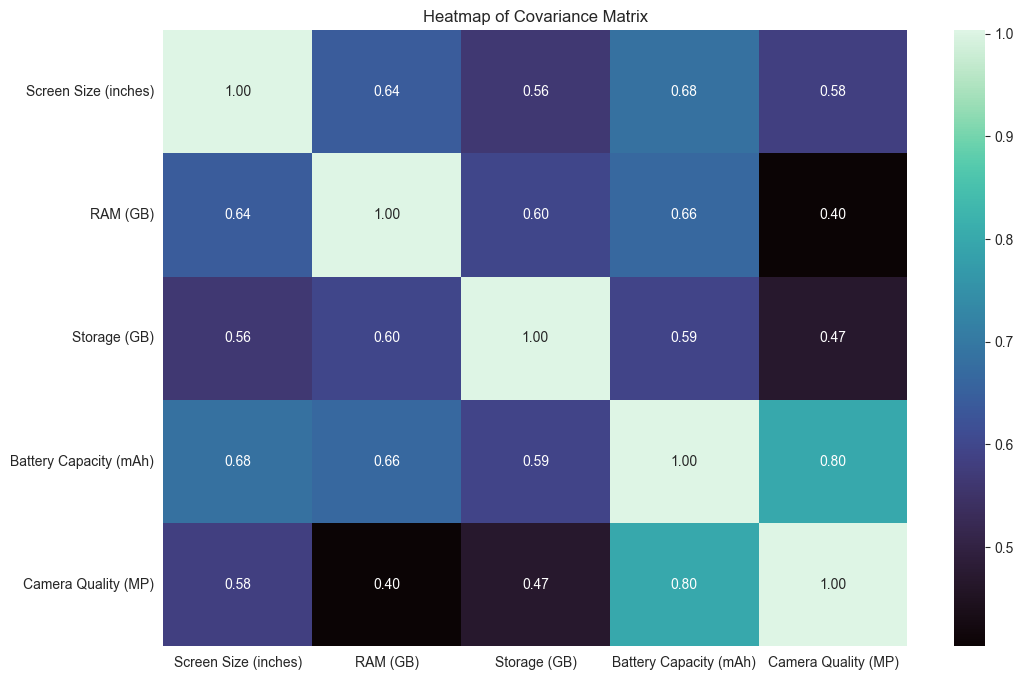

In [6]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

mean = np.mean(X, axis=0)
scale = np.std(X, axis=0)
X_std = (X - mean) / scale
# Eigendecomposition of covariance matrix
cov_mat = np.cov(X_std.T)

# Створення теплової карти
plt.figure(figsize=(12, 8),facecolor='white')
sns.heatmap(cov_mat, annot=True, cmap='mako', fmt=".2f", xticklabels=['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)',
       'Battery Capacity (mAh)', 'Camera Quality (MP)'],
      yticklabels=['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)',
       'Battery Capacity (mAh)', 'Camera Quality (MP)'])
plt.title('Heatmap of Covariance Matrix')
plt.show()

In [7]:
class GoldenSectionSearch:
    def search(self, f, a_init, b_init, epsilon):
        c = (3 - np.sqrt(5)) / 2
        a, b, y, z, f_y, f_z = [], [], [], [], [], []
        y.append(a_init + c * (b_init - a_init))
        z.append(a_init + (1 - c) * (b_init - a_init))
        f_y.append(f(y[-1]))
        f_z.append(f(z[-1]))

        if f_y[-1] <= f_z[-1]:
            b.append(z[-1])
            a.append(a_init)
        else:
            a.append(y[-1])
            b.append(b_init)

        itr = 0
        while b[-1] - a[-1] > epsilon:
            itr += 1
            if f_y[-1] <= f_z[-1]:
                z.append(y[-1])
                f_z.append(f_y[-1])
                y.append(a[-1] + c * (b[-1] - a[-1]))
                f_y.append(f(y[-1]))
            else:
                y.append(z[-1])
                f_y.append(f_z[-1])
                z.append(a[-1] + (1 - c) * (b[-1] - a[-1]))
                f_z.append(f(z[-1]))

            if f_y[-1] <= f_z[-1]:
                a.append(a[-1])
                b.append(z[-1])
            else:
                a.append(y[-1])
                b.append(b[-1])

        if f_y[-1] <= f_z[-1]:
            x = y[-1]
            f_x = f_y[-1]
        else:
            x = z[-1]
            f_x = f_z[-1]

        return x, f_x


In [8]:
def fib(n):
    i = 1
    j = i
    c = 1
    while c < n:
        i, j = j, i + j
        c += 1
    return i


# find index of fib number
def get_iteration(vars):
    # j число фібоначі
    # i попереднє число фіб
    i, j, c = 1, 1, 0
    while i <= vars:
        i, j = j, i + j
        c += 1
    return c
def fib_method(f, a, b, eps):
    vars = round((b - a) / eps)  # знаходить найменше потрібне число фібоначі
    n = get_iteration(vars) + 1  # знаходить номер того фіб числа
    x1 = a + (fib(n - 2) / fib(n)) * (b - a)
    x2 = a + (fib(n - 1) / fib(n)) * (b - a)
    fx1 = f(x1)
    fx2 = f(x2)
    k = 0
    iterations = 0  # зберігатиме кількість ітерацій
    while abs(b - a) >= eps:
        iterations += 1
        if fx1 <= fx2:
            b, x2 = x2, x1
            fx2 = fx1
            x1 = a + (fib(n - k - 3) / fib(n - k - 1)) * (b - a)
            fx1 = f(x1)
        else:
            a, x1 = x1, x2
            fx1 = fx2
            x2 = a + (fib(n - k - 2) / fib(n - k - 1)) * (b - a)
            fx2 = f(x2)
        k += 1
        print(f"Iteration {iterations}: a = {a}, b = {b}, x1 = {x1}, x2 = {x2}, f(x1) = {fx1}, f(x2) = {fx2}")

    return (a + b) / 2, iterations


In [9]:

data_url = "Mobile Price Prediction.csv"
def read(data_url):
    with open(data_url, 'r') as f:
        reader = csv.DictReader(f)
        data = [row for row in reader]
    return data


def receive(data):
    feature_names = [key for key in data[0].keys() if key  in [
        'Screen Size (inches)', 'RAM (GB)', 'Storage (GB)',
        'Battery Capacity (mAh)', 'Camera Quality (MP)']]
    print("here",feature_names)
    features = [[float(row[key]) for key in feature_names] for row in data]
    price = [float(row['Price ($)']) for row in data]
    return preprocessing.normalize(np.array(features)), preprocessing.normalize([np.array(price)])[0]


In [10]:
X,y = receive(read(data_url))
print(X)

here ['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)', 'Battery Capacity (mAh)', 'Camera Quality (MP)']
[[1.54968746e-03 9.99798360e-04 1.59967738e-02 9.99798360e-01
  1.19975803e-02]
 [1.95973640e-03 9.63804786e-04 4.11223375e-02 9.99144294e-01
  3.85521914e-03]
 [1.44196461e-03 1.33104425e-03 5.67912215e-02 9.98283191e-01
  1.41978054e-02]
 ...
 [1.31820983e-03 1.59783010e-03 5.11305632e-02 9.98643813e-01
  9.58698060e-03]
 [1.44371179e-03 1.33265703e-03 2.84300167e-02 9.99492775e-01
  1.42150084e-02]
 [2.03283589e-03 1.33300714e-03 2.13281143e-02 9.99755356e-01
  5.33202856e-03]]


In [11]:
df.columns

Index(['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)',
       'Battery Capacity (mAh)', 'Camera Quality (MP)', 'Price ($)'],
      dtype='object')

## Using gradient descent ##
here ['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)', 'Battery Capacity (mAh)', 'Camera Quality (MP)']
[[1.54968746e-03 9.99798360e-04 1.59967738e-02 9.99798360e-01
  1.19975803e-02]
 [1.95973640e-03 9.63804786e-04 4.11223375e-02 9.99144294e-01
  3.85521914e-03]
 [1.44196461e-03 1.33104425e-03 5.67912215e-02 9.98283191e-01
  1.41978054e-02]
 ...
 [1.31820983e-03 1.59783010e-03 5.11305632e-02 9.98643813e-01
  9.58698060e-03]
 [1.44371179e-03 1.33265703e-03 2.84300167e-02 9.99492775e-01
  1.42150084e-02]
 [2.03283589e-03 1.33300714e-03 2.13281143e-02 9.99755356e-01
  5.33202856e-03]]
[0.04581231 0.0732997  0.05497478 0.06413724 0.05039354 0.06871847
 0.04123108 0.06413724 0.05039354 0.03664985 0.04581231 0.0732997
 0.05497478 0.06413724 0.05039354 0.06871847 0.04123108 0.06413724
 0.05039354 0.03664985 0.04581231 0.0732997  0.05497478 0.06413724
 0.05039354 0.06871847 0.04123108 0.06413724 0.05039354 0.03664985
 0.04581231 0.0732997  0.05497478 0.06413724

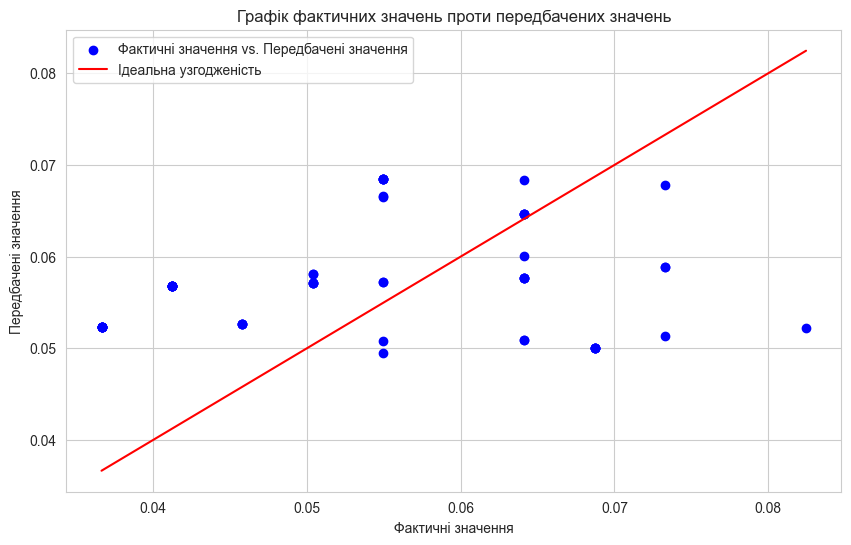

In [12]:
import csv
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def Loss(X, y, W, b):
    return np.sum((y - (W @ X.T + b)) ** 2) / X.shape[0]


def dldw(X, y, W, b):
    return -2 * X.T @ (y - (W @ X.T + b)) / X.shape[0]


def dldb(X, y, W, b):
    return -2 * np.sum(y - (W @ X.T + b)) / X.shape[0]


def gradient_descent(X, y, W, b, max_iterations=10000):
    itr = 0
    beta = get_beta(X, y, W, b)
    while np.abs(Loss(X, y, W, b) - Loss(X, y, W - beta * dldw(X, y, W, b),b - beta * dldb(X, y, W, b))) > 1e-9 and itr < max_iterations:
        itr += 1
        beta = get_beta(X, y, W, b)
        W = W - beta * dldw(X, y, W, b)
        b = b - beta * dldb(X, y, W, b)
        print( f"Iteration {itr} | W = {W}| b = {b}")

    return W, b

def get_beta(X, y, W, b):
    epsilon = 1e-5
    def approximation(beta):
        return Loss(X, y, W - beta * dldw(X, y, W, b), b - beta * dldb(X, y, W, b))

    beta, _ = fib_method(approximation, 0, 10, epsilon)
    return beta

def plot_scatter(X, y, W, b):
    plt.scatter(X[:, 0], y)
    plt.plot(X[:, 0], W[0] * X[:, 0] + b, color='red', label='Linear Regression')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
print("## Using gradient descent ##")
X, y = receive(read(data_url))
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

W = np.array([0.4] * X.shape[1])
b = 0.4
start_time = time.time()
W, b = gradient_descent(X_train, y_train, W, b)
print("Loss on test set:", Loss(X_test, y_test, W, b))
end_time = time.time()
# Predicting on test set
y_pred_test = W @ X_test.T + b
execution_time = end_time - start_time
print("Час виконання: ", execution_time, " секунд")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Фактичні значення vs. Передбачені значення')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ідеальна узгодженість')
plt.title('Графік фактичних значень проти передбачених значень')
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')
plt.legend(loc='upper left')
plt.show()
# print("\nPredicted values on test set:")
# 
# print("\nActual values on test set:")
# print(y_test)
# 
# print("\n\n## Using sklearn ##")

In [13]:
X

array([[1.54968746e-03, 9.99798360e-04, 1.59967738e-02, 9.99798360e-01,
        1.19975803e-02],
       [1.95973640e-03, 9.63804786e-04, 4.11223375e-02, 9.99144294e-01,
        3.85521914e-03],
       [1.44196461e-03, 1.33104425e-03, 5.67912215e-02, 9.98283191e-01,
        1.41978054e-02],
       ...,
       [1.31820983e-03, 1.59783010e-03, 5.11305632e-02, 9.98643813e-01,
        9.58698060e-03],
       [1.44371179e-03, 1.33265703e-03, 2.84300167e-02, 9.99492775e-01,
        1.42150084e-02],
       [2.03283589e-03, 1.33300714e-03, 2.13281143e-02, 9.99755356e-01,
        5.33202856e-03]])

Mean Squared Error: 0.00013445445245833336


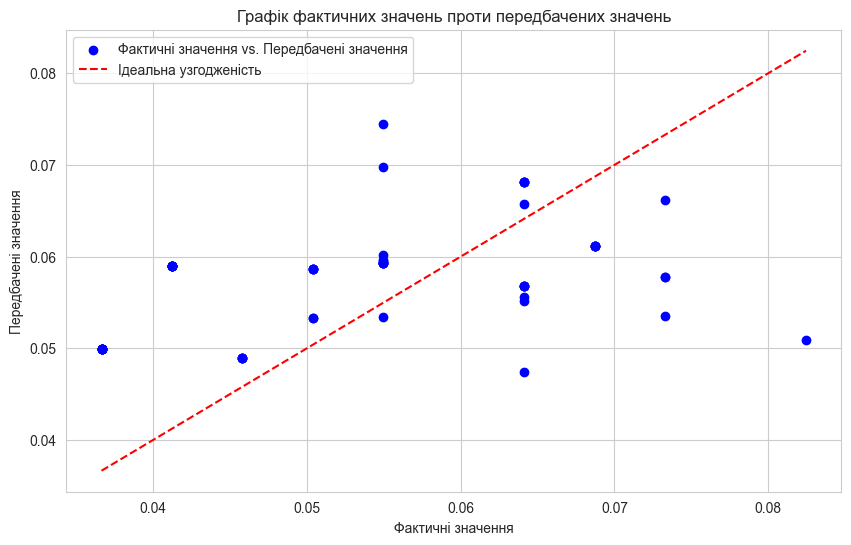

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt

# Створення графіку
plt.figure(figsize=(10, 6))

# Зображення фактичних значень
plt.scatter(y_test, y_pred, color='blue', label='Фактичні значення vs. Передбачені значення')

# Зображення прямої, яка показує ідеальну узгодженість
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ідеальна узгодженість')

# Додавання маркерів та підписів
plt.title('Графік фактичних значень проти передбачених значень')
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')
plt.legend(loc='upper left')

# Показ графіку
plt.show()

In [15]:
y

array([0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039354,
       0.06871847, 0.04123108, 0.06413724, 0.05039354, 0.03664985,
       0.04581231, 0.0732997 , 0.05497478, 0.06413724, 0.05039

In [16]:
print(y_pred_test)

[0.06003601 0.05812693 0.05002567 0.05712194 0.05087075 0.05138377
 0.05002567 0.06837849 0.05234647 0.0678669  0.05718691 0.05768283
 0.05768283 0.05812693 0.05234647 0.06469113 0.05684    0.05002567
 0.05234647 0.06849275 0.0666391  0.05684    0.05684    0.05085342
 0.05002567 0.05234647 0.06849275 0.06655369 0.0526568  0.0526568
 0.06849275 0.05684    0.06849275 0.05719741 0.05234647 0.05768283
 0.05234647 0.05086101 0.06469113 0.05768283 0.0522569  0.05684
 0.06469113 0.05684    0.05234647 0.0526568  0.06849275 0.05712194
 0.05712194 0.04953835 0.05712194 0.05234647 0.06469113 0.0526568
 0.05881763 0.05002567 0.05881763 0.05684    0.05684   ]


In [17]:
#Using built-in LinearRegression from sklearn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error

# Обчислення середньої абсолютної помилки
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.00013445445245833336
Mean Absolute Error: 0.009825055754679221
